##### Name: Ms. Kiran Santosh Jambhale
##### HW 4: Binary class Logistic Regression using Gradient Ascent

In [174]:
import numpy as np

#load given data
D = np.loadtxt("mnist_data.txt")
L = np.loadtxt("mnist_labels.txt")

In [175]:
#alter data to replace '8' with 1 and the others with '0'
for i in range (len(L)):
    if (L[i]==8):
        L[i]=1
    else:
        L[i]=0
print (L)

[0. 0. 0. ... 0. 0. 0.]


In [176]:
L = L.reshape(10000, 1)

In [177]:
D.shape

(10000, 784)

In [178]:
# iterations = 10
# learningRate = 0.001

In [179]:
#prediction function
def sigmoid(regularization):
    return 1 / (1 + np.exp(-regularization))

In [180]:
#function to calculate log likelihood given the data, labels, weights
def log_likelihood(data, labels, weights):
    regularization = np.dot(data, weights)
    likelihood = np.sum( labels*regularization - np.log(1 + np.exp(regularization)) )
    return likelihood

In [185]:
#stochastic version of the logistic regression algorithm
def logistic_regression(data, labels, iterations, learningRate, add_intercept = False):
    if add_intercept:
        intercept = np.ones((data.shape[0], 1))
        data = np.hstack((intercept, data))
        
    weights = np.zeros(data.shape[1])
    
    for iter1 in range(iterations):
        regularization = np.dot(data, weights)
        predictions = sigmoid(regularization)
        
        errorValue = labels - predictions
        gradient = np.dot(data.T, errorValue)
        weights += learningRate * gradient
            
    return (weights)

In [182]:
data=np.vstack(D).astype(np.float32)

In [183]:
labels=np.hstack(L).astype(np.float32)

In [186]:
weights = logistic_regression(data, labels,
                     iterations = 3000, learningRate = 0.0001, add_intercept=True)

-1032777655.3406501


C:\Users\kiran\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


In [187]:
weights

array([-5.97700093e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -1.90000000e-03, -1.18000000e-02,
       -7.90000000e-03, -2.01500000e-02, -3.61500000e-02, -7.78500000e-02,
       -1.56950000e-01, -4.58900000e-01, -2.63299887e-01, -3.31049197e-01,
       -2.72649168e-01, -5.17500000e-02, -1.40450000e-01, -2.59000000e-01,
       -2.51000000e-02, -9.60000000e-03,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [188]:
square_w = np.square(weights)

In [189]:
square_w

array([3.57245402e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.61000000e-06, 1.39240000e-04,
       6.24100000e-05, 4.06022500e-04, 1.30682250e-03, 6.06062250e-03,
       2.46333025e-02, 2.10589210e-01, 6.93268307e-02, 1.09593571e-01,
       7.43375688e-02, 2.67806250e-03, 1.97262025e-02, 6.70810000e-02,
       6.30010000e-04, 9.21600000e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [190]:
sum_sqw = np.sum(square_w)

In [191]:
sum_sqw

268961.2545653318

In [202]:
#arbitrary values have been chosen to calculate mylambda, such that mylambda = arbitrary value * sum of squares of weights
mylambda = 0.0001 * sum_sqw

In [203]:
mylambda

26.89612545653318

In [194]:
#prediction function to be used for calculating accuracy
def predict(D, weights):
    p=1/(1+np.exp(-(sum(np.dot(D,weights))-mylambda)))
    return p

In [195]:
predictions1 = []
wts1 = logistic_regression(data, labels, iterations = 3000, learningRate = 0.0001, add_intercept=True)
for i in D:
    predicted_val = predict(D, wts1[:-1])
    if predicted_val >= 0.5:
        predicted_val = 1
    else:
        predicted_val = 0
        
    predictions1.append(predicted_val)

-1032777655.3406501


C:\Users\kiran\miniconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\kiran\miniconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


As we can see, we have plotted an image of '8', using the weights that we obtained after applying logistic regression on the data and its labels. Though a blur image, it can be easily figured out that an image of 8 has been formed. This shows that our logistic regression model works correctly and as expected.

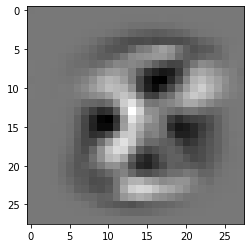

In [143]:
# plotting of '8'
w1 = np.reshape(weights[:-1],(28,28))
plt.imshow(w1, cmap='gray')
plt.show()

In [196]:
#accuracy of the hence implemented logistic regression
accuracy = 0
acc = []
for i in range(len(L)):
    if predictions1[i]==labels[i]:
        accuracy = accuracy + 1
        
acc = accuracy/float(len(L))*100
print (acc)

90.25999999999999


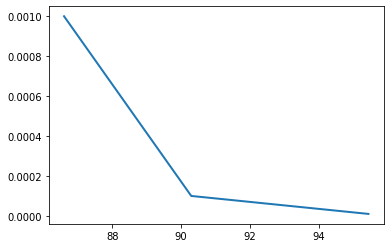

In [201]:
#graph of mylambda vs corresponding accuracy
myAccuracy = [86.603, 90.295, 95.437]
lambda1 = [0.001, 0.0001, 0.00001]
plt.plot(myAccuracy, lambda1, linewidth=2.0)

In the above graph, it can be seen that as the value of the lambda increases the accuracy drops. Therefore, we can say that lambda is inversely proportional to the accuracy. As we move closer and closer to 0, the accuracy increases. Thus, smaller the value of lambda, the higher the accuracy. The value of lambda decides how much the weights change or learn for every epoch.